#### Алгоритм, который считывает текст из файла (в файле может быть больше одной строки) и выводит самое частое слово в этом тексте и через пробел то, сколько раз оно встретилось. Если таких слов несколько, вывести лексикографически первое. Слова, написанные в разных регистрах, считаются одинаковыми.

In [2]:
pip install wikipedia 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import wikipedia #загрузим статью с wikipedia о Алроса и сохраним данные в фале txt.
wikipedia.set_lang('ru')  
result = wikipedia.search('Алроса')
page = wikipedia.page(result[0])
print(page.content)
text = page.content
alrosa = open('alrosa.txt','w')
alrosa.write(text)

Алроса — российская группа алмазодобывающих компаний, занимающая лидирующую позицию в мире по объёму добычи алмазов (по состоянию на 2017 год). Корпорация занимается разведкой месторождений, добычей, обработкой и продажей алмазного сырья. Основная деятельность сосредоточена в Якутии, а также в Архангельской области и Африке.
«Алроса» добывает 95 % всех алмазов России, доля компании в мировом объёме добычи алмазов составляет 27 %. Компания располагает разведанными запасами, достаточными для поддержания текущего уровня добычи не менее 18-20 лет. Прогнозные запасы «Алроса» составляют около одной трети общемировых запасов алмазов.
«Алроса» — крупнейшая публичная компания в алмазодобывающем секторе, ценные бумаги которой торгуются на Московской Бирже (тиккер ALRS).
Полное официальное наименование — Акционерная компания «Алроса» (публичное акционерное общество), краткое АК «Алроса» (ПАО). Сочетание букв «алроса» использовано в наименовании компании с 1996 года и является акронимом от слов ру

19633

In [4]:
f = open('alrosa.txt', 'r', encoding='Windows-1251') #прочтем полученный ранее файл txt.
text = f.read()
len(text)

19633

In [5]:
text = text.lower() #переведём символы в единый нижний регистр. 

In [6]:
import string #очистим текст от лишних символов.
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
spec_chars = string.punctuation 

In [8]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [9]:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [10]:
from pymystem3 import Mystem #проведем лемматизацию текста.
m = Mystem()  
text = m.lemmatize(text) 
text = " ".join(text) 

In [11]:
import nltk #токенизация текста.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
from nltk import word_tokenize 
text_tokens = word_tokenize(text)

In [13]:
len(text_tokens)

2685

In [14]:
text_tokens[:20] #посмотрим первые 20 слов.

['алроса',
 '—',
 'российский',
 'группа',
 'алмазодобывающий',
 'компания',
 'занимать',
 'лидировать',
 'позиция',
 'в',
 'мир',
 'по',
 'объем',
 'добыча',
 'алмаз',
 'по',
 'состояние',
 'на',
 'год',
 'корпорация']

In [15]:
from nltk.probability import FreqDist #для подсчёта статистики распределения частот слов в тексте применим класс FreqDist.

In [16]:
result_words = [x for x in text_tokens if len(x) > 3] #отсеем предлоги.

In [17]:
fdist_sw = FreqDist(result_words)

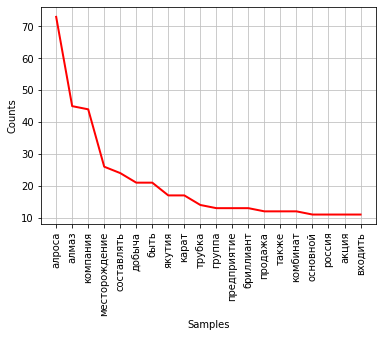

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
fdist_sw.plot(20, cumulative=False, color='red') #выведем ключевые слова

In [19]:
fdist_sw.most_common(10) #выведем список ключевых слов.

[('алроса', 73),
 ('алмаз', 45),
 ('компания', 44),
 ('месторождение', 26),
 ('составлять', 24),
 ('добыча', 21),
 ('быть', 21),
 ('якутия', 17),
 ('карат', 17),
 ('трубка', 14)]

#### 3.  На вход алгоритма первой строкой передаётся количество известных слов, после чего указываются эти слова. Затем передаётся количество строк текста для проверки, после чего строки этого текста. Необходимо вывести уникальные слова с ошибками (без учёта регистра) в произвольном порядке.

In [20]:
a, a1 = [], [] #создадим циклы передачи слов и последующего исключения известных слов.
print('передаём количество известных слов')
for text in range(int(input())):
    print('указываем известные слова')
    a.append(input().lower())
print('передаём количество строк текста для проверки')
for text in range(int(input())):
    print('передаём строчку текста для проверки')
    a1 += input().lower().split()
for text in set(a1):
    if text not in a:
        print()
        print('уникальное слово : ',text)

передаём количество известных слов
3
указываем известные слова
алроса
указываем известные слова
алмаз
указываем известные слова
компания
передаём количество строк текста для проверки
8
передаём строчку текста для проверки
Алроса российская группа алмазодобывающих компаний
передаём строчку текста для проверки
Алроса лидер по объёму добычи алмазов
передаём строчку текста для проверки
Компания которая знает что такое алмаз
передаём строчку текста для проверки
Алроса крупнейшая публичная компания в алмазодобывающем секторе
передаём строчку текста для проверки
Основные производственные мощности Алроса сосредоточены в Якутии
передаём строчку текста для проверки
Всего Алроса разрабатывает 27 месторождений
передаём строчку текста для проверки
Группе Алроса принадлежит шесть горнодобывающих комплексов
передаём строчку текста для проверки
Сбытовая система Алроса построена на заключении долгосрочных контрактов

уникальное слово :  группа

уникальное слово :  секторе

уникальное слово :  группе

у